<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **05. Visualization: Matplotlib, seaborn and Plotly** </center>



## **Outline**
1. [**Matplotlib**](#eje1)
2. [**Seaborn**](#eje2)
3. [**Plotly**](#eje3)




In [1]:
#@title Execute this cell
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-C1" #@param {type:"string"}
assignment_id = group_id +'.matplotlib'
student_id = "2211233" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [3]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "/ai-uis-student-master" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student-master


In [4]:
#@title **Load libs** { display-mode: "form" }

import warnings
warnings.filterwarnings("ignore")

import imageio
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
# import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from IPython.display import HTML

# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# **1. Matplotlib**  <a name="eje1"></a>


Matplotlib is the most common python library for visualizations. Matplotlib's API is relatively low level that allows to integrate many kind of plot versions. The most important function in matplotlib is plot, which allows you to plot 2D data. See some examples below:


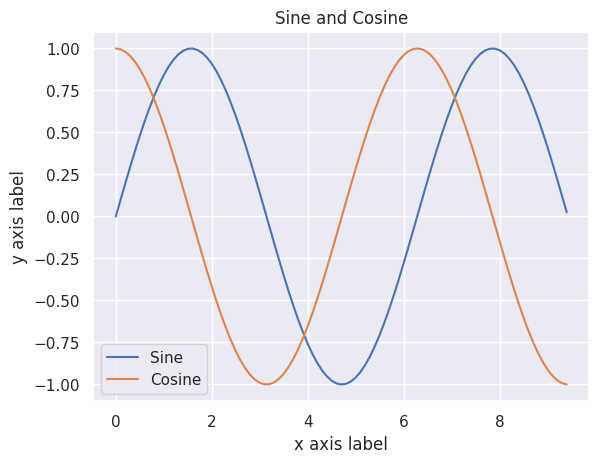

In [5]:
#@title **code** plot
import numpy as np
import matplotlib.pyplot as plt


#@markdown Contruct vectors to represent functions
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
#print(type(x), x.shape)
y_sin = np.sin(x)
#print(type(y_sin), y_sin.shape)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

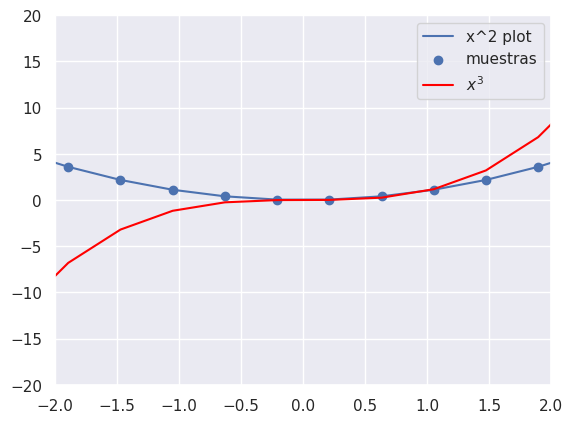

In [6]:
#@title **code** plot and scatter
#@markdown With **plt.plot** drawn conected points and with  **plt.scatter"** independent points. See some examples below and enjoy!
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-4,4,20)
#print(x)
#print(x**2)
plt.plot(x, x**2, label="x^2 plot")
plt.scatter(x, x**2, label="muestras")
plt.plot(x, x**3, label="$x^3$", color="red")
plt.xlim([-2,2])
plt.ylim([-20, 20])
plt.legend()

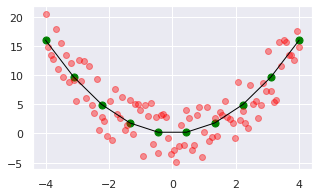

In [ ]:
#@title **code**
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(5,3))
x = np.linspace(-4,4,10)
plt.plot(x, x**2, color="black", linewidth=1)
plt.scatter(x, x**2, c="green", s=50)
x_r = np.linspace(-4,4,100)
#print(x_r.shape)
x_ruido = x_r**2  + (np.random.random(x_r.shape)-0.5)*10
plt.scatter(x_r,x_ruido, c="red", alpha=0.4);

(2.0, 5.0)

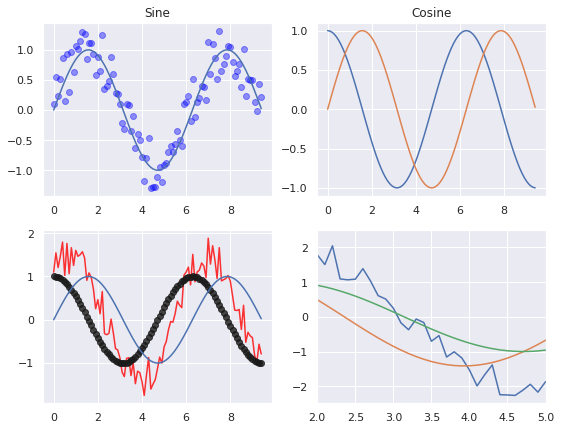

In [ ]:
#@title **code** subplot applications
#@markdown **Subplots**. You can plot several images in the same figure using the subplot function. This simple functionality is the first step to data analytics and to create board decision schemes.
x = np.arange(0, 3 * np.pi, 0.1)
#print(type(x), x.shape)
y_sin = np.sin(x)
#print(type(y_sin), y_sin.shape)
y_cos = np.cos(x)
y_sruido = y_sin  + (np.random.random(y_sin.shape)-0.5)
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.figure(figsize=(9,7))
plt.subplot(2,2, 1)

# Make the first plot
plt.title('Sine')
plt.plot(x, y_sin);
plt.scatter(x, y_sruido, c="blue", alpha=0.4)
# Set the second subplot as active, and make the second plot.
plt.subplot(2, 2, 2)
plt.plot(x, y_cos);plt.title('Cosine')
plt.plot(x, y_sin);

plt.subplot(2,2,3)
sumc = y_cos+y_sruido
plt.plot(x, sumc, c="red", alpha=0.8)
plt.plot(x, y_cos, 'k:', linewidth=0.1,marker='o',  alpha=0.8);
plt.plot(x, y_sin);
plt.subplot(2,2,4)
sums = y_sin+y_sruido
sumsc = y_sin+y_cos
plt.plot(x, sums);
plt.plot(x, sumsc);
plt.plot(x, y_sin);
plt.xlim([2,5])


**Additional types**

_Colores_
- 'c' Cián.
- 'b' Azul.
- 'g' Verde.
- 'y' Amarillo.
- 'k' Negro.
- 'w' Blanco.
- 'r' Rojo.
- 'm' Magenta.

_Trazado_

- '-' Línea sólida.
- '-.' Línea con puntos y rayas.
- '--' Línea a rayas
- ':'  Línea punteada

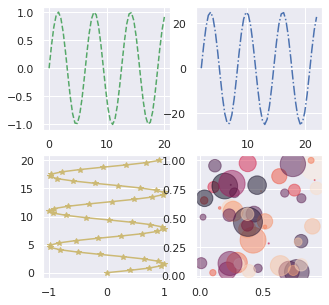

In [ ]:
#@title **code**
x = np.linspace(0,20,50)
y= np.sin(x)
plt.figure(figsize=(5,5))
# Primera gráfica
plt.subplot(2,2,1)
plt.plot(x, y,'g--')
# Segunda grafica
plt.subplot(2,2,2)
plt.plot(x+2, y*25,'b-.')
# Tercera grafica
plt.subplot(2,2,3)
plt.plot(y, x,'y-*')
# Cuarta grafica
plt.subplot(2,2,4)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Plot a board figure of (3x2) with next information.
- In first row plot 1000 points from `np.random.normal` (plot 1) and `np.random.random` (plot 2)
- Use for this ponts the `scatter` type
- In second row plot the respective histograms for bot set of points.
- Third row is free!. Please explore other kind of plots

In [ ]:
#@title **code student**




# **2. Seaborn**  <a name="eje2"></a>
Seaborn is an API visualization on top of Matplotlib that defines among others high level funtions to integrate other libraries as Pandas, statistical plots, and visual analytics. See some examples and comparison with Matplotlib.



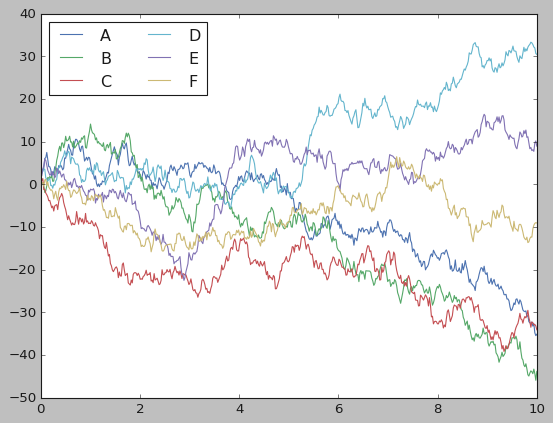

In [7]:
# @title **code** classical plots matplotlip vs seaborn

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')

rng = np.random.RandomState(0)

x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

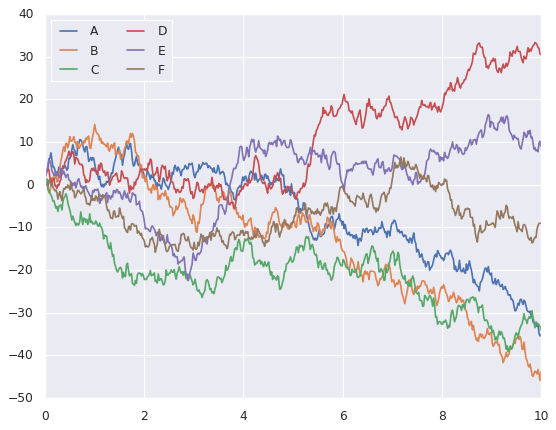

In [8]:
#@title **code**
import seaborn as sns
sns.set_theme()
#sns.set_theme(style="white")
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Repeat previous challenge but with seaborn

In [ ]:
#@title **code student**




- **Pay attention**. Once you run `sns` the backened by default is seaborn. For instance run again first cells.
- **Importantly**, Seaborn plotting functions are specialized on data from `Pandas DataFrames`.

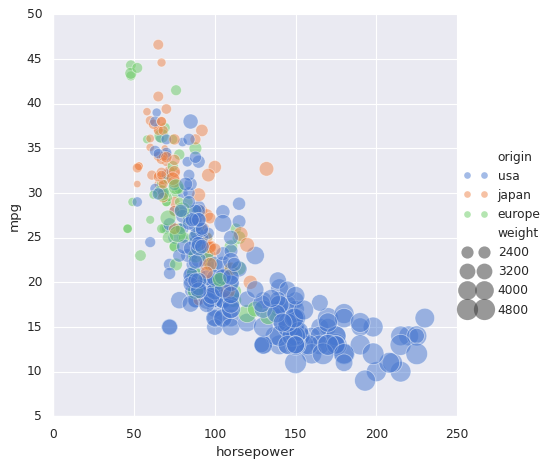

In [10]:
# @title **code** working with pre-load data
#el scatter plot o relational plot busca relacion entre variables
mpg = sns.load_dataset("mpg") #miles per gallon
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

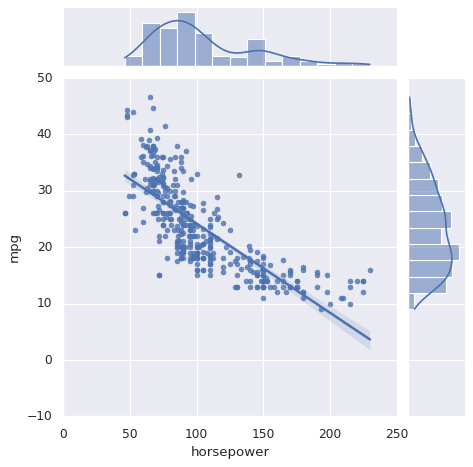

In [11]:
#@title **code** Nice plots  to nice data analytics
sns.jointplot(x="horsepower", y="mpg", data=mpg, kind='reg');

<Axes: xlabel='median_income', ylabel='median_house_value'>

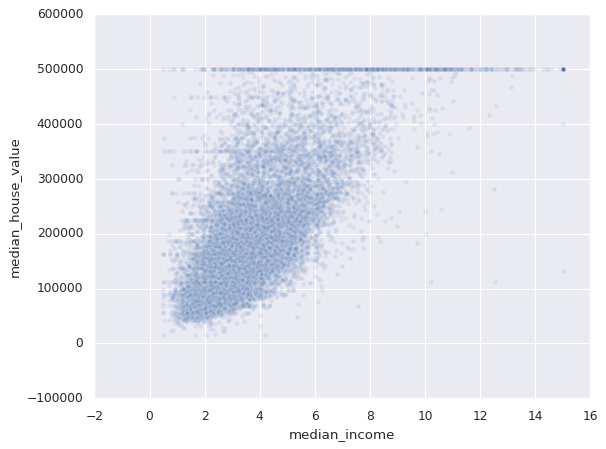

In [12]:
#@title **code** from matplotlip
#@markdown **More about Plotting with pandas**
#@markdown  From California housing dataset.
import pandas as pd
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
d.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**Plotly + pandas.**  

- From `'California housing train'`:  
- Use `pairplot` to observe correlation among four variables

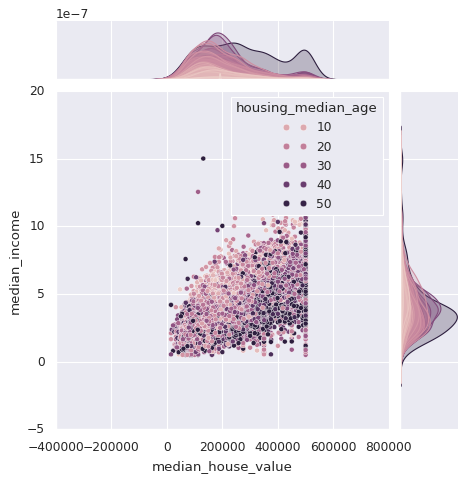

In [ ]:
#@title **code student**
import pandas as pd
import numpy as np
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
#@title **code** from seaborn
sns.jointplot(x="median_house_value", y="median_income", data=d, hue ="housing_median_age");



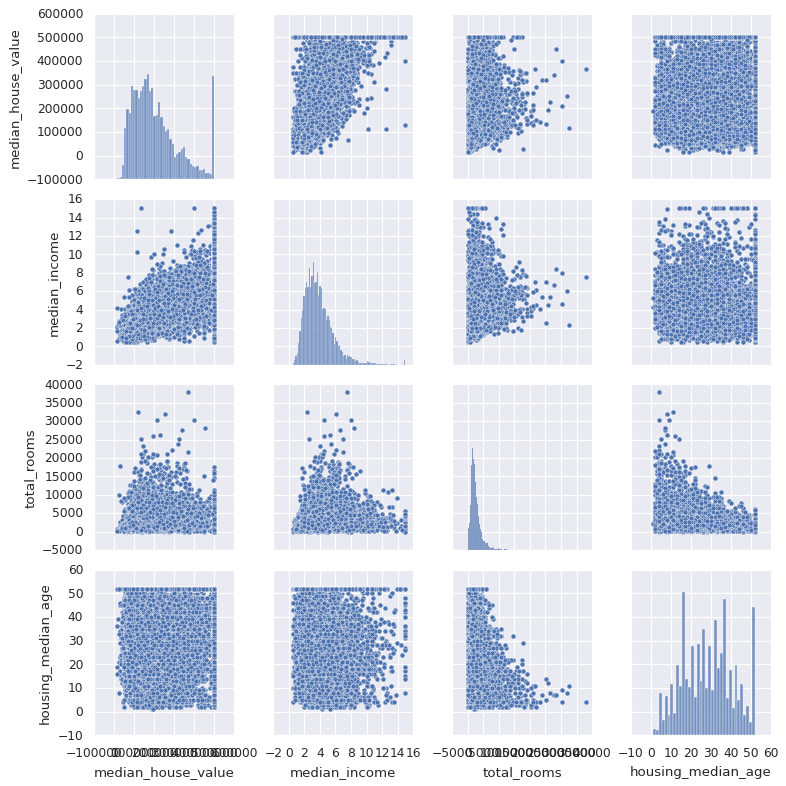

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
atributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
d = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
df = pd.DataFrame(d)
sns.pairplot(df, vars=atributes)

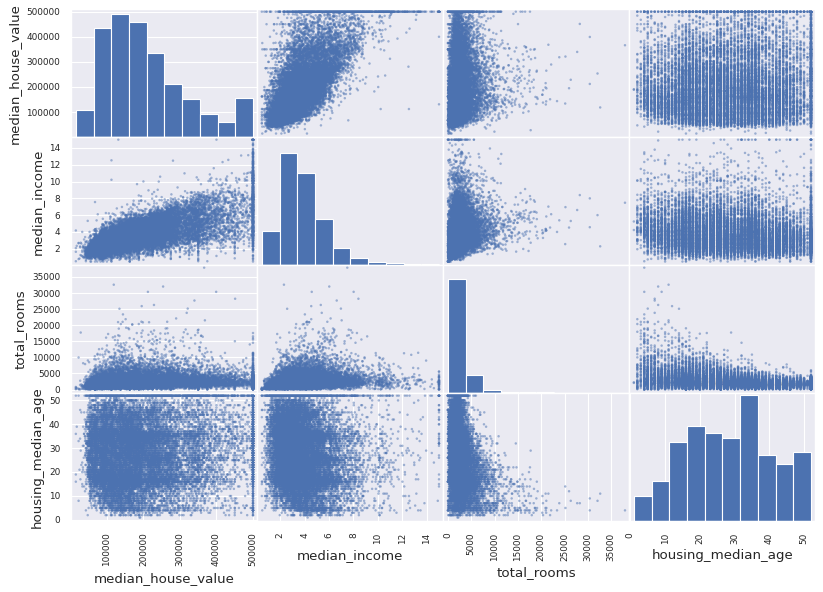

In [ ]:
#@title **code** from matplotlip but with backened seaborn
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8));

#pd.plotting.scatter_matrix(d, figsize=(10,10));

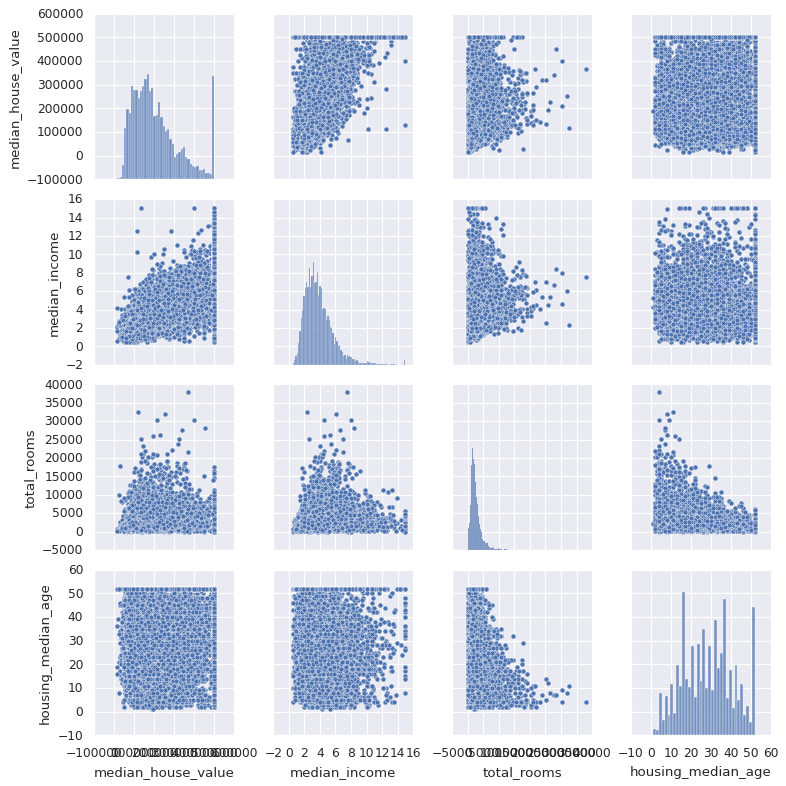

In [21]:
#@title **code** from seaborn
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
sns.pairplot(data=d[attributes])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

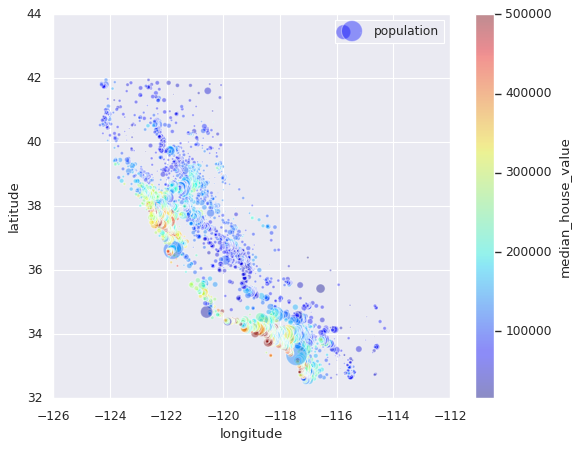

In [22]:
#@title **code** multidimensional plot
#@markdown from matplotlib
d.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=d["population"]/100,
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

<Axes: xlabel='longitude', ylabel='latitude'>

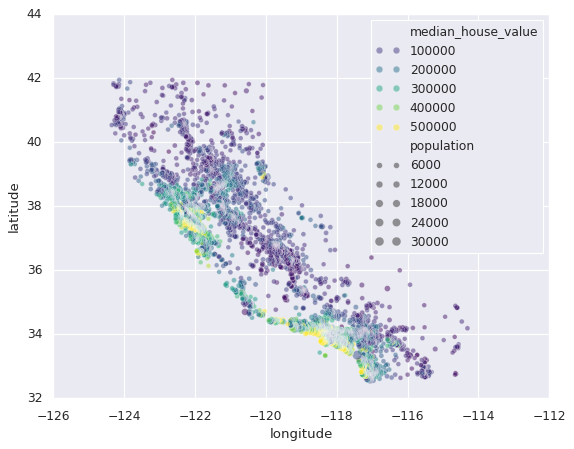

In [23]:
#@title **code** with seaborn

sns.scatterplot(
    data=d,
    x="longitude", # Changed "Longitude" to "longitude"
    y="latitude",
    size="population",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5
)


# **3. Plotly**  <a name="eje3"></a>

Plotly provides online graphing, web-based analytic applications, and statistics tools for individuals and collaboration. Plotly is one  of the most common used tools in problems related with ML and AI., rinning in multiple platformas such as Python, R, among many others.





In [24]:
#@title Function to display Plotly figures
#@markdown Unfortunately, you will have to run this function at the beginning of each cell with plotly figures (in colaboratory).
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()

In [25]:
#@title **code** To plot lines
# import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
configure_plotly_browser_state()

x = np.arange(10)
y = x**2

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig

In [ ]:
#@title **code** plot with filled range
configure_plotly_browser_state()

x = np.arange(10)
y = x**2
noise = np.random.uniform(high=10, size=(10))

# Create the figure.
fig = go.Figure()

# Add the trace with the x**2 line
fig.add_trace(go.Scatter(x=x, y=y, name='x**2'))

# Add the shade by adding other scatter with random noise.
filled_line_x = x.tolist() + x.tolist()[::-1]
filled_line_y = (y + noise).tolist() + (y - noise).tolist()[::-1]
fig.add_trace(
    go.Scatter(
        x=filled_line_x,
        y=filled_line_y,
        fill='toself',
        fillcolor='rgba(231,107,243,0.2)',
        line_color='rgba(255,255,255,0)',
        name='y**2 filled with noise :)'
    )
)

fig

In [26]:
#@title **code** Working with dataset.
#@markdown What about iris dataset?
configure_plotly_browser_state()

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 facet_col="species", title="Scatter plot - Iris dataset species")

fig = fig.update_xaxes(showgrid=False)
fig

In [28]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

### **Plotly + Pandas**

For this part we will use part of the [Titanic](https://www.kaggle.com/c/titanic/data?select=train.csv) dataset . Our main focus here is to learn how to make easy to make and beautiful graphics. Please load, from course repository at: `data/titanic/train.csv`


In [29]:
#@title **code**
titanic_df = pd.read_csv('data/titanic/train.csv')
titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [31]:
#@title **code**
#@markdown We can create an histogram that summarizes the passenger's ages distribution
configure_plotly_browser_state()

#titanic_df["Age"].iplot(
#    kind="histogram",
#    bins=20,
#    theme="white",
#    title="Passenger's Ages",
#    xTitle='Ages',
#    yTitle='Count'
#)

fig = px.histogram(titanic_df, x="Age")
fig

In [32]:
#@title **code**
#@markdown We can also compare 2 different distribution. For example we will show female and male passengers’ ages in the same plot.
configure_plotly_browser_state()

titanic_df["male_age"] = titanic_df[titanic_df["Sex"]=="male"]["Age"]
titanic_df["female_age"] = titanic_df[titanic_df["Sex"]=="female"]["Age"]

titanic_df[["male_age","female_age"]].iplot(
    kind="histogram",
    bins=20,
    theme="white",
    title="Passenger's Ages",
    xTitle='Ages',
    yTitle='Count'
)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [33]:
#@title **code**
#@markdown Lets compute the correlation between the variables within our dataset and plot them in a convenient and effortless way

configure_plotly_browser_state()

titanic_df.corr(numeric_only=True).iplot(
    kind='heatmap',
    colorscale="Blues",
    title="Feature Correlation Matrix",
)

## **Images**

Lets load an image from the internet, go and google an image you like, copy the image url and use the function below to download it to your workspace.

In [35]:
pip install imageio[pyav]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 26.9 MB/s eta 0:00:00


In [34]:
#@title **code** Using other data like the images.
#@markdown firstly download the sources
#@markdown then, you can visualize them!
def download_image_from_url(url, filename='sample_image.png'):
    import requests
    response = requests.get(url)
    file = open(filename, "wb")
    file.write(response.content)
    file.close()

filename = 'xray_image.png'
download_image_from_url(
    "https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imagenBreast.jpg",
    filename=filename
)
configure_plotly_browser_state()

img = imageio.imread(filename)
fig = px.imshow(img)
fig

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**Boxplots**  

We going to use the boxplot to visualize titanic dataset. Plot the distribution of age people with respect to each Pclass, but taking into account the Sex.

In [ ]:
#@title **code student**




## **Referencias**

[1] [official numpy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

[2] [Matplotlib](https://matplotlib.org/)

[3] [Seaborn](https://seaborn.pydata.org/)

[4] [Data studio Google](https://datastudio.google.com/overview)

[5]  [Plotly documentation for Python](https://plotly.com/python/)

[6]  [The Next Level of Data Visualization in Python](https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e)


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
